According to marking rubric, only questions 1, 6, and 8 are marked right???

**Q1**

Standard Error of the Mean:
    - measures the difference in sample mean from the total population mean
    - it helps show how reliable the sample mean is as an estimate of the population mean

Standard Deviation:
    - measures the inconsistency of a set of data points from the mean
    - it shows variability of individual data points in a dataset

**Q6**

1. What is the process of bootstrapping?

The process of bootstrapping is taking random values from a dataset and putting them together into a sample. Repeat this step many times and gather many samples of the dataset.

2. What is the main purpose of bootstrapping?

The main purpose of bootstrapping is to allow us to analyze a dataset by looking at a small sample instead of the whole thing.

3. If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?

I would create bootstrap samples and calculate the mean for each of them to get the distribution of bootstrap means. Then I would calculate the 2.5th and 97.5th percentiles for a 95% confidence interval to determine a range of means. Lastly, check the hypothesized guess and see if it falls within the 95% confidence interval.

**SUMMARY OF CHATBOT**

Standard Deviation vs. Standard Error of the Mean:

Standard Deviation (SD) measures the variability within a dataset.
Standard Error of the Mean (SEM) estimates how much the sample mean is expected to vary from the true population mean and decreases with larger sample sizes.
Population Mean:

The population mean is the average of all values in a population.
It is calculated using all data points in the population.
Sample Mean:

The sample mean is the average of a subset of data taken from a population.
It serves as an estimate of the population mean and can vary between different samples.
Bootstrapping:

Bootstrapping is a resampling technique used to estimate the distribution of a statistic by repeatedly sampling with replacement from the original data.
It helps estimate properties like confidence intervals and standard errors, especially when traditional assumptions don’t hold.

**Q8**

Problem Introduction: 

The company Alitech has created a new vaccine that aims to improve peoples health. We have to find if the vaccine is effective or not.

Null hypothesis:

The null hypothesis in this context states that the vaccine has no effect on the patients health scores

In [6]:
import pandas as pd

# Create the data as a dictionary
data_dict = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Create a DataFrame
data = pd.DataFrame(data_dict)

# Save the DataFrame to a CSV file
data.to_csv('vaccine_data.csv', index=False)

Data Visualization:

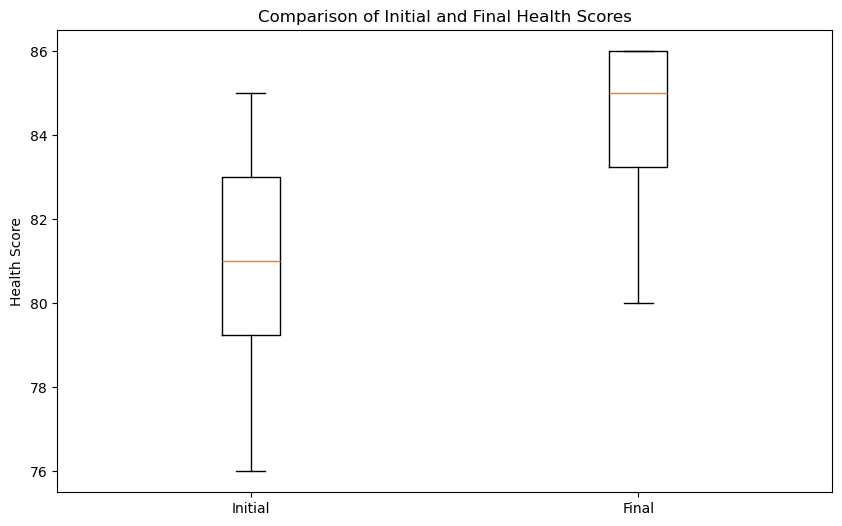

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('vaccine_data.csv')

# Prepare data for visualization
data_melted = data.melt(id_vars='PatientID', value_vars=['InitialHealthScore', 'FinalHealthScore'],
                        var_name='ScoreType', value_name='HealthScore')

# Create boxplot
plt.figure(figsize=(10, 6))
plt.boxplot([data['InitialHealthScore'], data['FinalHealthScore']], labels=['Initial', 'Final'])
plt.title('Comparison of Initial and Final Health Scores')
plt.ylabel('Health Score')
plt.show()

Quantitative Analysis:

In [8]:
import numpy as np

# Calculate observed mean difference
observed_diff = data['FinalHealthScore'].mean() - data['InitialHealthScore'].mean()

# Bootstrapping
np.random.seed(42)
n_iterations = 10000
bootstrap_diffs = []

for _ in range(n_iterations):
    boot_final = np.random.choice(data['FinalHealthScore'], size=len(data), replace=True)
    boot_initial = np.random.choice(data['InitialHealthScore'], size=len(data), replace=True)
    bootstrap_diffs.append(boot_final.mean() - boot_initial.mean())

# Calculate confidence interval
conf_interval = np.percentile(bootstrap_diffs, [2.5, 97.5])

# Calculate the proportion of bootstrapped means <= 0
p_value = np.mean(np.array(bootstrap_diffs) <= 0)

# Output results
observed_diff, conf_interval, p_value

(3.299999999999997, array([1.2, 5.4]), 0.001)

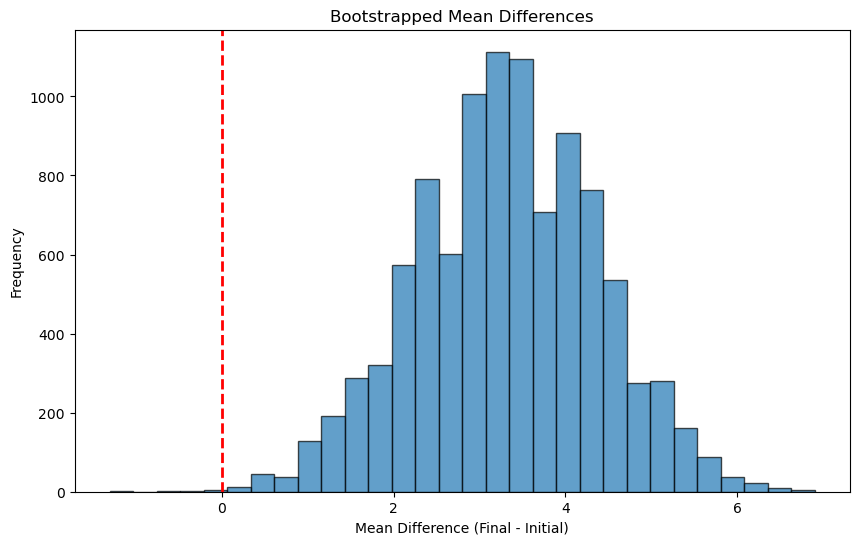

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_diffs, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(0, color='red', linestyle='dashed', linewidth=2)
plt.title('Bootstrapped Mean Differences')
plt.xlabel('Mean Difference (Final - Initial)')
plt.ylabel('Frequency')
plt.show()

Findings and discussion:

Based on the analysis:

    - If the confidence interval excludes zero and the p-value is less than 0.05, we reject the null hypothesis, indicating that the vaccine is effective in improving health scores.
    
    - If the confidence interval includes zero or the p-value is above 0.05, we fail to reject the null hypothesis, suggesting no evidence of the vaccine's effectiveness.
    
Further considerations:

    - Larger sample size
    - more diverse sample size, include older people and younger people

**SUMMARY OF CHATBOT**

Problem Introduction: Introducing the vaccine's aim and the analysis objective.
Null Hypothesis Explanation: Explaining the null hypothesis of "no effect."
Data Visualization: Suggesting code to visualize initial and final health scores of patients.
Quantitative Analysis: Outlining a bootstrapping method to evaluate health score differences.
Supporting Visualizations: Providing code to visualize the distribution of bootstrapped means.
Findings and Discussion: Interpreting results based on confidence intervals.
Conclusion: Concluding on the vaccine's effectiveness based on analysis.
Further Considerations: Highlighting potential confounding factors and the need for larger studies. 